Import all necessary libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from datetime import datetime
from google.colab import drive

#visual style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

Connect to Google Drive where our data is stored. This gives access to the electricity price data files.

In [ ]:
# Mount Google Drive to access data
drive.mount('/content/drive')

# Define paths for raw data and results
RAW_DATA_PATH = "/content/drive/MyDrive/WattGrid/data/raw"
RESULTS_PATH = "/content/drive/MyDrive/WattGrid/data/results/eda_results"
os.makedirs(RESULTS_PATH, exist_ok=True)  # Create results directory if it doesn't exist

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Find all CSV files in the raw data directory and its subdirectories
print("Looking for data files...")
all_files = glob.glob(os.path.join(RAW_DATA_PATH, "**/*.csv"), recursive=True)
total_files = len(all_files)

if total_files == 0:
    print("No CSV files found! Check the path.")
else:
    print(f"Found {total_files} CSV files to process.")

    # Read files with progress tracking
    df_list = []
    for i, file in enumerate(all_files):
        if i % 10 == 0:  # Show progress update every 10 files
            print(f"Processing file {i+1}/{total_files} ({(i+1)/total_files*100:.1f}%)")
        df_list.append(pd.read_csv(file))

    # Combine all dataframes into one
    df = pd.concat(df_list, ignore_index=True)
    print(f"Data Loaded: {df.shape[0]:,} rows and {df.shape[1]} columns")

Looking for data files...
Found 828 CSV files to process.
Processing file 1/828 (0.1%)
Processing file 11/828 (1.3%)
Processing file 21/828 (2.5%)
Processing file 31/828 (3.7%)
Processing file 41/828 (5.0%)
Processing file 51/828 (6.2%)
Processing file 61/828 (7.4%)
Processing file 71/828 (8.6%)
Processing file 81/828 (9.8%)
Processing file 91/828 (11.0%)
Processing file 101/828 (12.2%)
Processing file 111/828 (13.4%)
Processing file 121/828 (14.6%)
Processing file 131/828 (15.8%)
Processing file 141/828 (17.0%)
Processing file 151/828 (18.2%)
Processing file 161/828 (19.4%)
Processing file 171/828 (20.7%)
Processing file 181/828 (21.9%)
Processing file 191/828 (23.1%)
Processing file 201/828 (24.3%)
Processing file 211/828 (25.5%)
Processing file 221/828 (26.7%)
Processing file 231/828 (27.9%)
Processing file 241/828 (29.1%)
Processing file 251/828 (30.3%)
Processing file 261/828 (31.5%)
Processing file 271/828 (32.7%)
Processing file 281/828 (33.9%)
Processing file 291/828 (35.1%)
Pr

In [ ]:
# Convert date columns to datetime format
df['TradingDate'] = pd.to_datetime(df['TradingDate'])
if 'PublishDateTime' in df.columns:
    df['PublishDateTime'] = pd.to_datetime(df['PublishDateTime'])

<ipython-input-10-a1ed9650b2b8>:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['PublishDateTime'] = pd.to_datetime(df['PublishDateTime'])


In [ ]:
# Display basic information about the dataset
print("\nData Structure Overview:")
print(df.info())


Data Structure Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57301800 entries, 0 to 57301799
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   TradingDate             object 
 1   TradingPeriod           int64  
 2   PublishDateTime         object 
 3   PointOfConnection       object 
 4   Island                  object 
 5   IsProxyPriceFlag        object 
 6   DollarsPerMegawattHour  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.0+ GB
None


In [ ]:
# Generate statistical summary
print("\nStatistical Summary:")
stats = df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).T
stats['range'] = stats['max'] - stats['min']  # Add range column
print(stats)


Statistical Summary:
                             count                           mean  \
TradingDate               57301800  2023-12-19 07:52:44.456649728   
TradingPeriod           57301800.0                      24.728262   
DollarsPerMegawattHour  57301800.0                     148.081417   

                                        min                   5%  \
TradingDate             2022-11-01 00:00:00  2022-12-11 00:00:00   
TradingPeriod                           1.0                  3.0   
DollarsPerMegawattHour              -159.55                 0.03   

                                        25%                  50%  \
TradingDate             2023-05-23 00:00:00  2023-12-20 00:00:00   
TradingPeriod                          13.0                 25.0   
DollarsPerMegawattHour                30.58               133.95   

                                        75%                  95%  \
TradingDate             2024-07-15 00:00:00  2024-12-27 00:00:00   
TradingPeriod      

In [ ]:
# Check for missing values
print("\nMissing Values Analysis:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Values'] > 0])


Missing Values Analysis:
        Missing Values  Percentage
Island           29386    0.051283


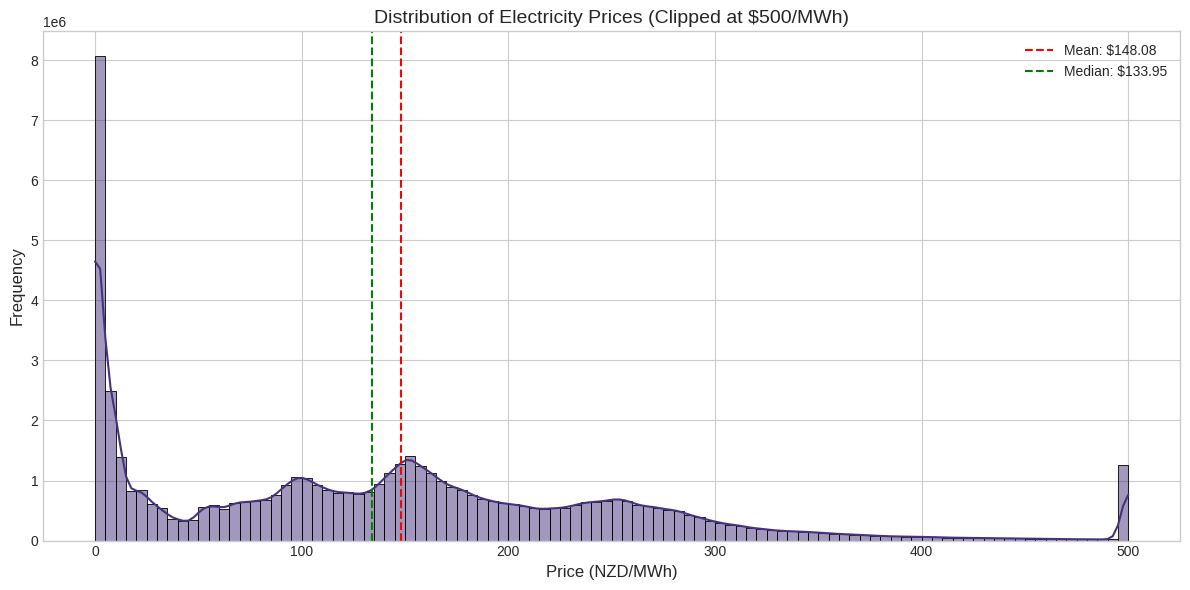

In [ ]:
# Visualize the distribution of electricity prices
plt.figure(figsize=(12, 6))
# Clipping at $500 to better visualize the main distribution
sns.histplot(df["DollarsPerMegawattHour"].clip(0, 500), bins=100, kde=True)
plt.title("Distribution of Electricity Prices (Clipped at $500/MWh)", fontsize=14)
plt.xlabel("Price (NZD/MWh)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(df["DollarsPerMegawattHour"].mean(), color='red', linestyle='--',
            label=f'Mean: ${df["DollarsPerMegawattHour"].mean():.2f}')
plt.axvline(df["DollarsPerMegawattHour"].median(), color='green', linestyle='--',
            label=f'Median: ${df["DollarsPerMegawattHour"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, "price_distribution.png"), dpi=300)
plt.show()

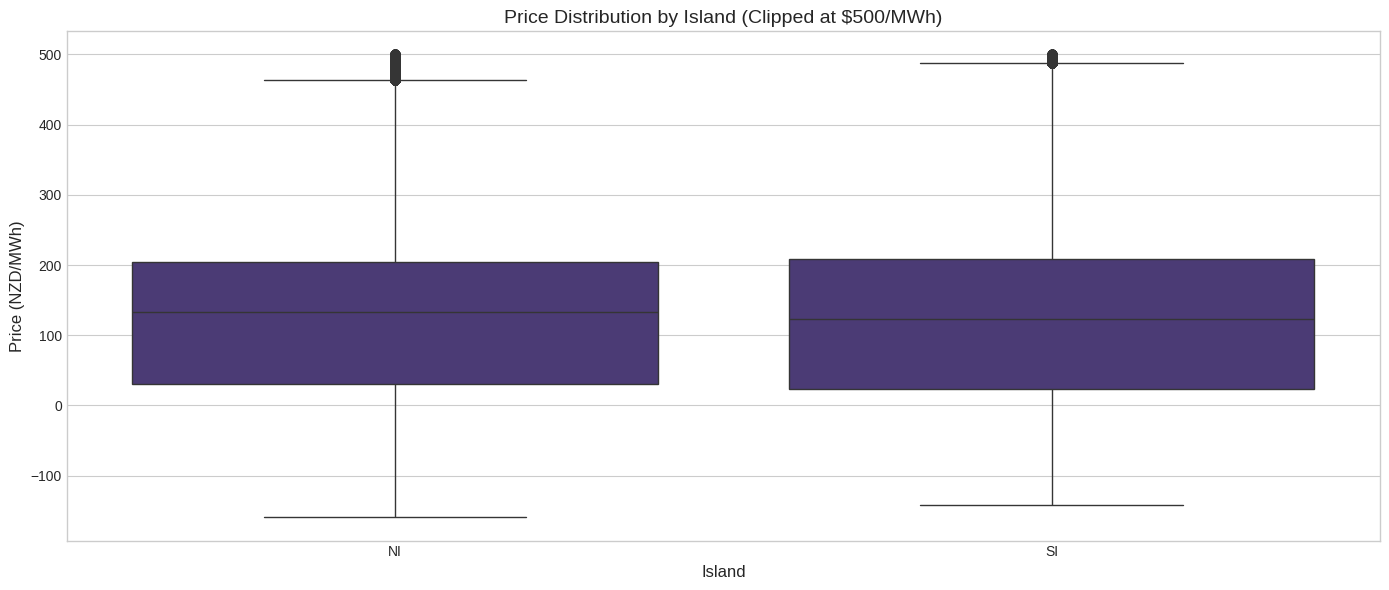

In [ ]:
# Compare price distributions between islands
plt.figure(figsize=(14, 6))
sns.boxplot(x='Island', y='DollarsPerMegawattHour', data=df[df['DollarsPerMegawattHour'] < 500])
plt.title("Price Distribution by Island (Clipped at $500/MWh)", fontsize=14)
plt.xlabel("Island", fontsize=12)
plt.ylabel("Price (NZD/MWh)", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, "price_by_island.png"), dpi=300)
plt.show()

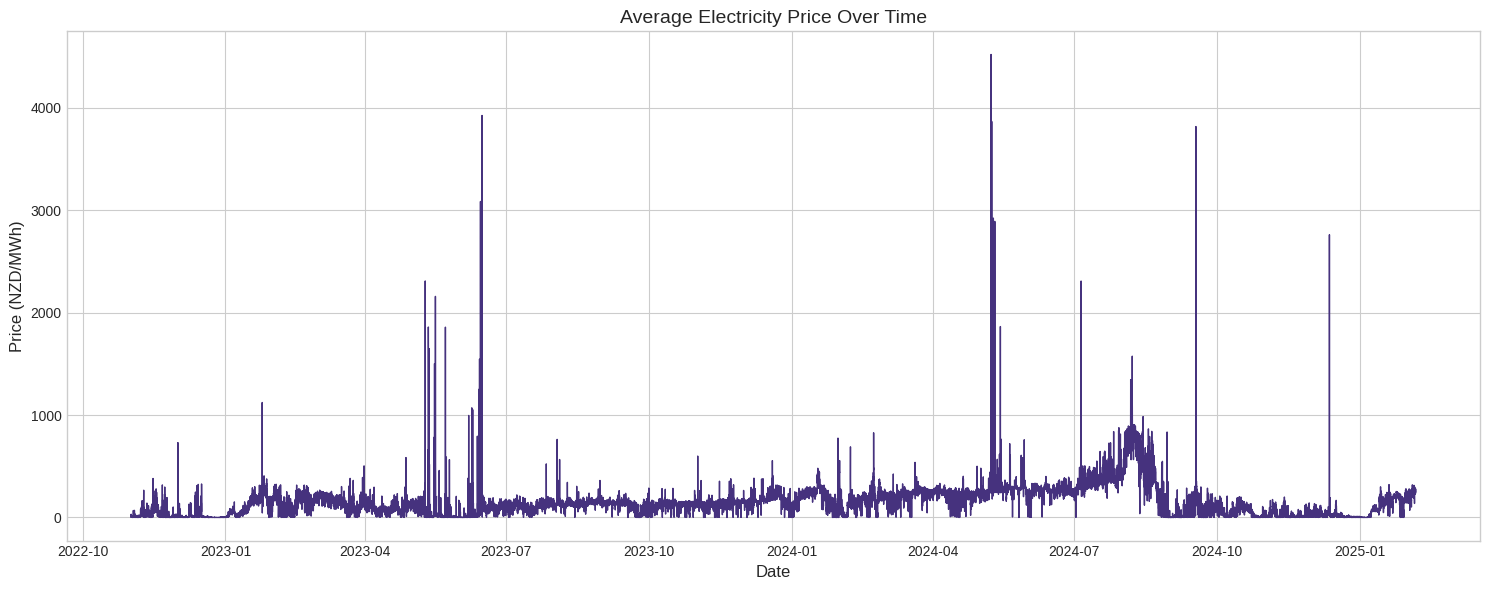

In [ ]:
# Create a time series of average electricity prices
# Aggregate by date and trading period
time_series = df.groupby(['TradingDate', 'TradingPeriod'])['DollarsPerMegawattHour'].mean().reset_index()

# Create datetime by combining date and period (each period is 30 minutes)
time_series['DateTime'] = time_series['TradingDate'] + pd.to_timedelta((time_series['TradingPeriod'] - 1) * 30, unit='m')
time_series = time_series.set_index('DateTime')

# Plot time series
plt.figure(figsize=(15, 6))
plt.plot(time_series.index, time_series['DollarsPerMegawattHour'], linewidth=1)
plt.title("Average Electricity Price Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (NZD/MWh)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, "price_time_series.png"), dpi=300)
plt.show()

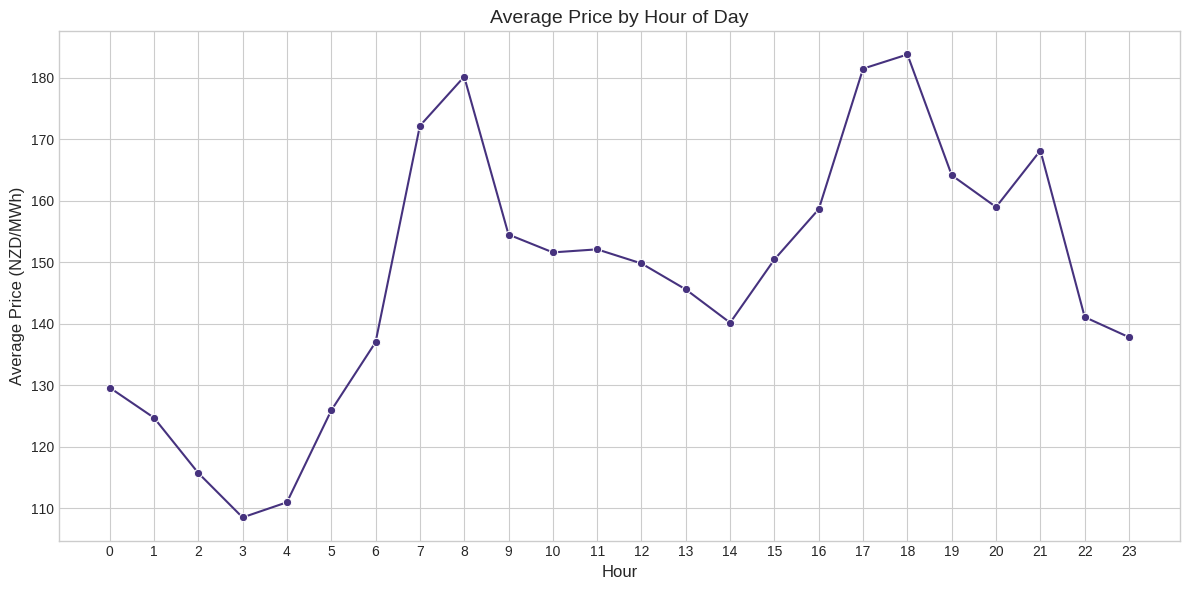

In [ ]:
# Extract hour and day of week for pattern analysis
time_series['Hour'] = time_series.index.hour
time_series['DayOfWeek'] = time_series.index.dayofweek

# Analyze hourly patterns
plt.figure(figsize=(12, 6))
hourly_avg = time_series.groupby('Hour')['DollarsPerMegawattHour'].mean()
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.title("Average Price by Hour of Day", fontsize=14)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Average Price (NZD/MWh)", fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, "price_by_hour.png"), dpi=300)
plt.show()

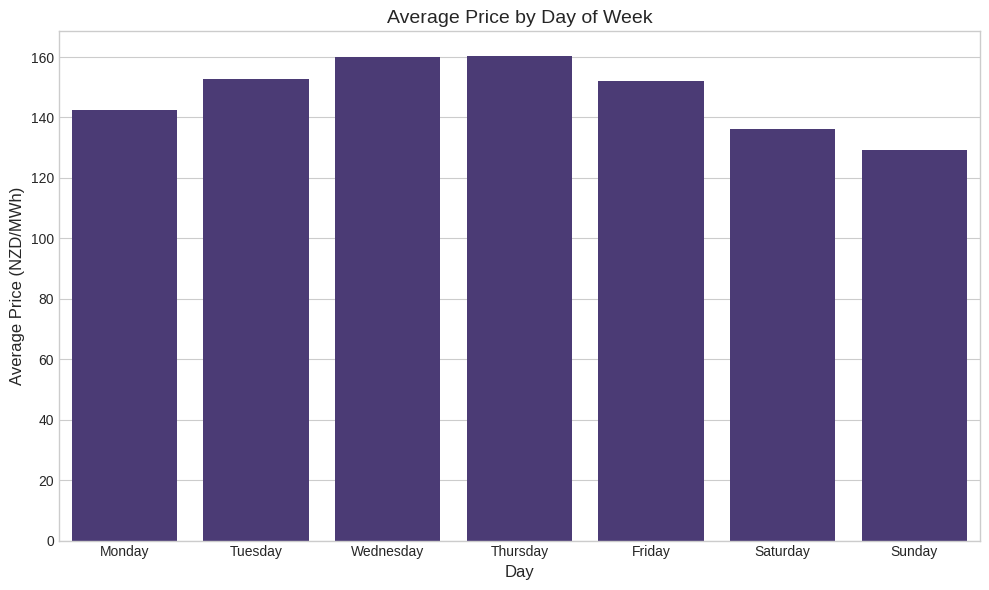

In [ ]:
# Analyze day of week patterns
plt.figure(figsize=(10, 6))
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = time_series.groupby('DayOfWeek')['DollarsPerMegawattHour'].mean()
sns.barplot(x=daily_avg.index, y=daily_avg.values)
plt.xticks(range(7), day_names)
plt.title("Average Price by Day of Week", fontsize=14)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Average Price (NZD/MWh)", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, "price_by_day.png"), dpi=300)
plt.show()

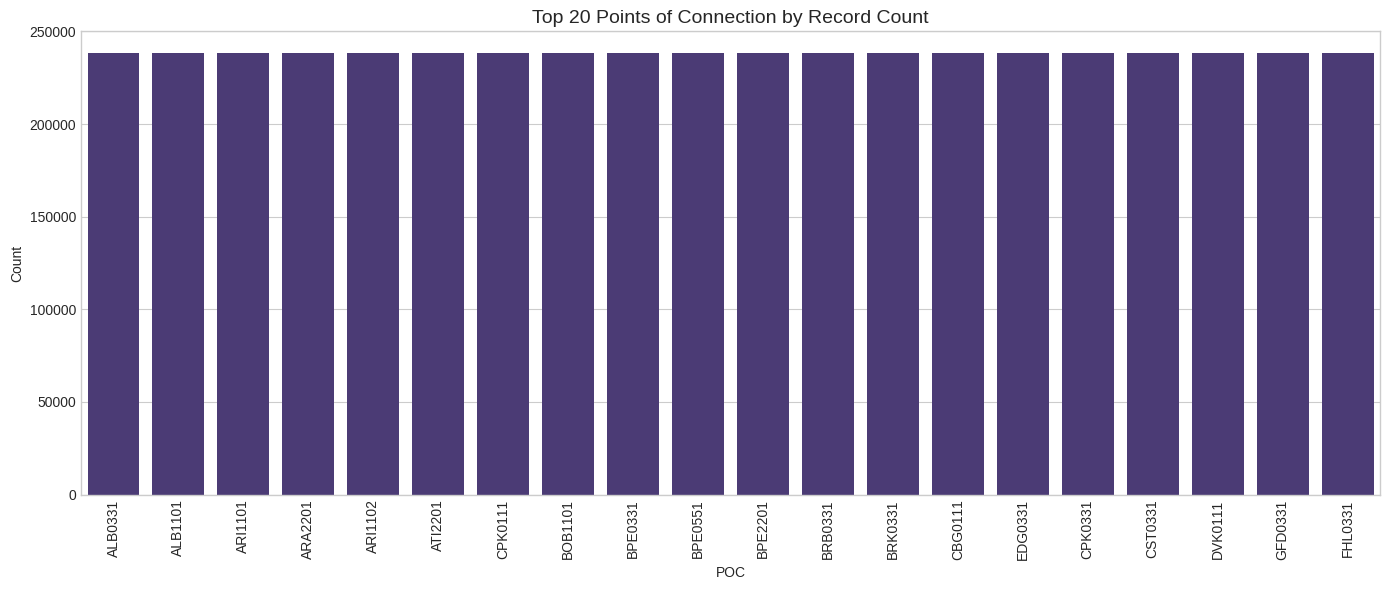

In [ ]:
# Analyze Points of Connection (POCs)
# Count of records by POC
poc_counts = df['PointOfConnection'].value_counts().reset_index()
poc_counts.columns = ['POC', 'Count']

# Display top 20 POCs by record count
plt.figure(figsize=(14, 6))
sns.barplot(x='POC', y='Count', data=poc_counts.head(20))
plt.title("Top 20 Points of Connection by Record Count", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, "top_pocs.png"), dpi=300)
plt.show()

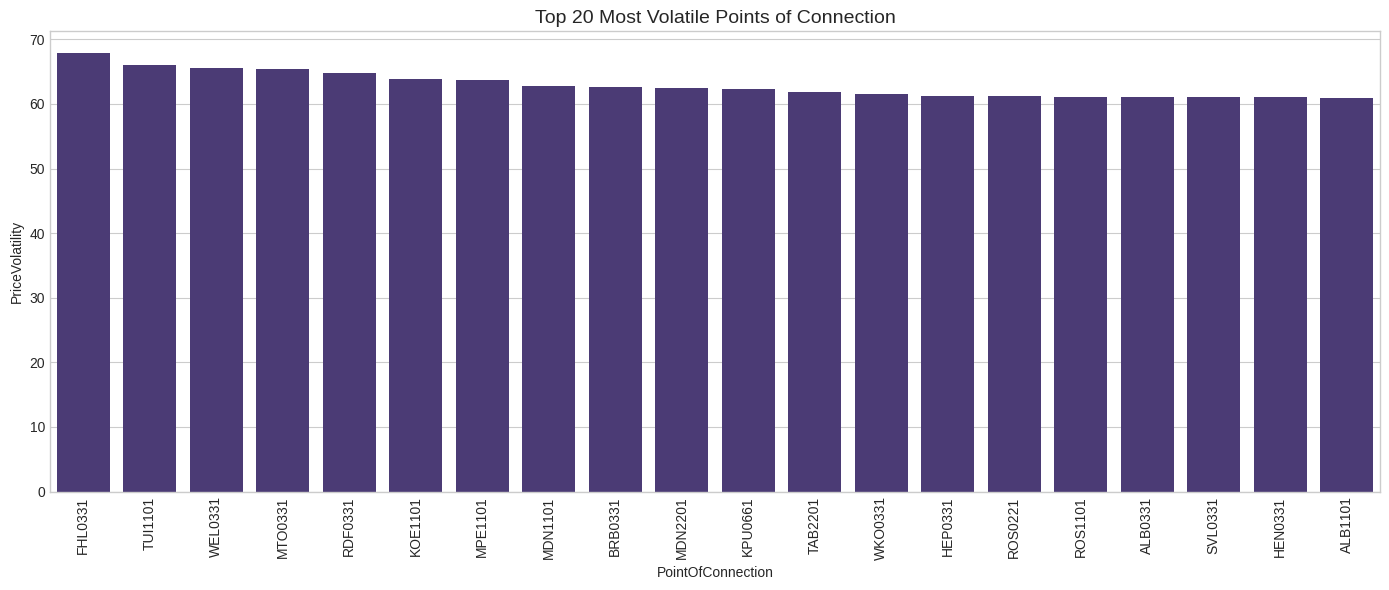

In [ ]:
# Analyze price volatility by POC
# Compute daily volatility
df['Date'] = df['TradingDate'].dt.date
volatility = df.groupby(['Date', 'PointOfConnection'])['DollarsPerMegawattHour'].std().reset_index()
volatility = volatility.rename(columns={'DollarsPerMegawattHour': 'PriceVolatility'})

# Calculate average volatility by POC
avg_volatility = volatility.groupby('PointOfConnection')['PriceVolatility'].mean().reset_index()
avg_volatility = avg_volatility.sort_values('PriceVolatility', ascending=False)

# Plot top 20 most volatile POCs
plt.figure(figsize=(14, 6))
sns.barplot(x='PointOfConnection', y='PriceVolatility', data=avg_volatility.head(20))
plt.title("Top 20 Most Volatile Points of Connection", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, "volatility_by_poc.png"), dpi=300)
plt.show()


Price Spike Analysis:
Defined price spikes as values above $348.07/MWh (95th percentile)
Total spikes detected: 2865038 (5.00% of all records)


<ipython-input-23-5487b4df8843>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spikes['Month'] = spikes['TradingDate'].dt.month
<ipython-input-23-5487b4df8843>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spikes['MonthName'] = spikes['TradingDate'].dt.strftime('%b')


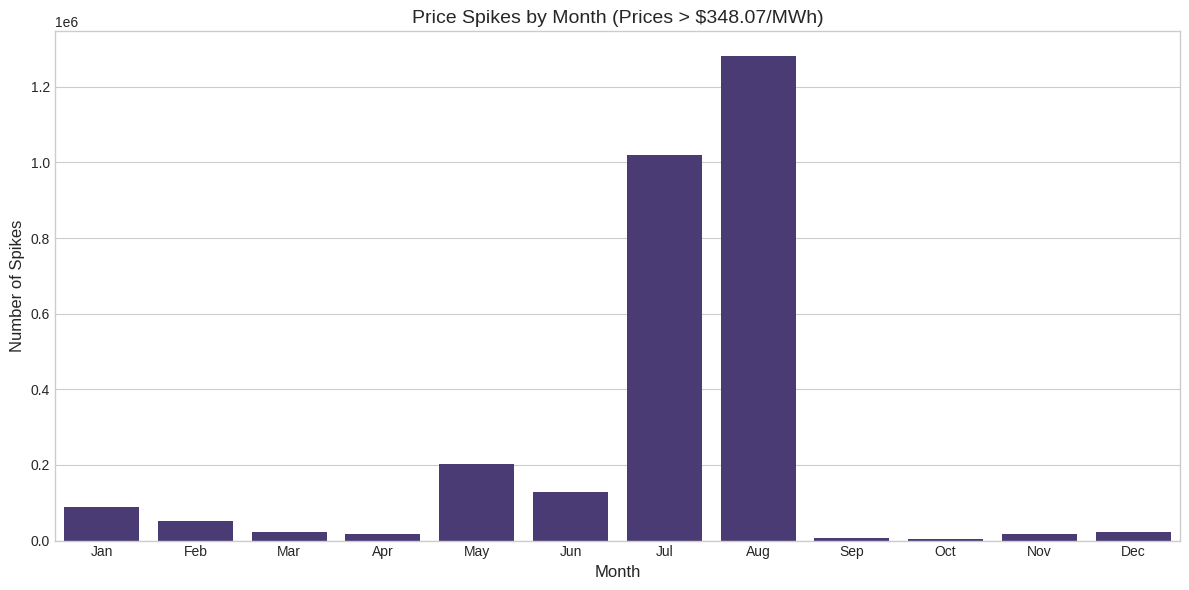

In [ ]:
# Analyze price spikes
# Define price spikes (prices above 95th percentile)
spike_threshold = df['DollarsPerMegawattHour'].quantile(0.95)
spikes = df[df['DollarsPerMegawattHour'] > spike_threshold]

print(f"\nPrice Spike Analysis:")
print(f"Defined price spikes as values above ${spike_threshold:.2f}/MWh (95th percentile)")
print(f"Total spikes detected: {len(spikes)} ({len(spikes)/len(df)*100:.2f}% of all records)")

# Analyze spikes by month
spikes['Month'] = spikes['TradingDate'].dt.month
spikes['MonthName'] = spikes['TradingDate'].dt.strftime('%b')
monthly_spikes = spikes.groupby(['Month', 'MonthName']).size().reset_index(name='SpikeCount')
monthly_spikes = monthly_spikes.sort_values('Month')

plt.figure(figsize=(12, 6))
sns.barplot(x='MonthName', y='SpikeCount', data=monthly_spikes, order=monthly_spikes['MonthName'])
plt.title(f"Price Spikes by Month (Prices > ${spike_threshold:.2f}/MWh)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Spikes", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, "spikes_by_month.png"), dpi=300)
plt.show()

In [ ]:
# Analyze proxy pricing events (if available in the data)
if 'IsProxyPriceFlag' in df.columns:
    proxy_counts = df['IsProxyPriceFlag'].value_counts()
    print("\nProxy Price Analysis:")
    print(proxy_counts)
    print(f"Percentage of proxy prices: {proxy_counts.get('Y', 0)/len(df)*100:.2f}%")

    # Analyze proxy prices by island
    if len(proxy_counts) > 1 and 'Y' in proxy_counts:
        proxy_by_island = df[df['IsProxyPriceFlag'] == 'Y'].groupby('Island').size()
        print("\nProxy prices by island:")
        print(proxy_by_island)


Proxy Price Analysis:
IsProxyPriceFlag
N    57121922
Y      179878
Name: count, dtype: int64
Percentage of proxy prices: 0.31%

Proxy prices by island:
Island
NI    97038
SI    75675
dtype: int64


In [ ]:
print("\nEDA completed successfully! Visualizations saved to results directory.")


EDA completed successfully! Visualizations saved to results directory.
